In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
from data import clean_and_split_nba_data as clean
from data import split_data as split
from data import resample_nba_data as re
from models import plot_validation_curve as vc
from models import eval_model as evm
from sklearn.ensemble import RandomForestClassifier
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("../data/raw/train.csv")
df

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [3]:
df_upsampled, df_downsampled = re.resample_nba_data(df)

df_minority.shape (1331, 22)  df_majority.shape (6669, 22)
df_minority.shape 0    1331
Name: TARGET_5Yrs, dtype: int64  df_majority.shape 1    6669
Name: TARGET_5Yrs, dtype: int64
df_upsampled  0    6669
1    6669
Name: TARGET_5Yrs, dtype: int64
0    6669
1    6669
Name: TARGET_5Yrs, dtype: int64
df_downsampled  0    1331
1    1331
Name: TARGET_5Yrs, dtype: int64
0    1331
1    1331
Name: TARGET_5Yrs, dtype: int64


In [4]:
df_upsampled.shape,df_downsampled.shape

((13338, 22), (2662, 22))

In [5]:
x_data, x_train, x_val, x_test, y_data , y_train, y_val,  y_test = clean.clean_and_split_nba_data(df_upsampled)

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', '3P Made', '3PA', 'FTM', 'FTA',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'CALC3P%', 'CALCFG%',
       'CALCFT%'],
      dtype='object')


In [6]:
x_data.shape

(10670, 19)

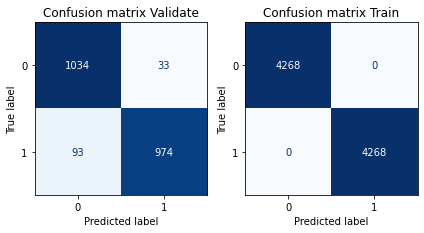

RandomForestClassifier(random_state=8)


(RandomForestClassifier(random_state=8), 1.0, 0.9838623825087462)

In [7]:
evm.eval_model(RandomForestClassifier(random_state=8),x_train,y_train,x_val,y_val)

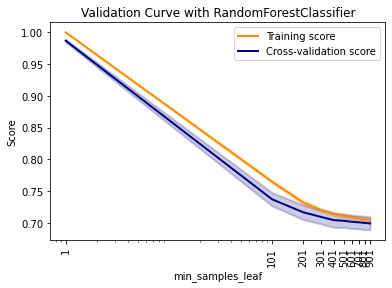

In [8]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(1,1000,100),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

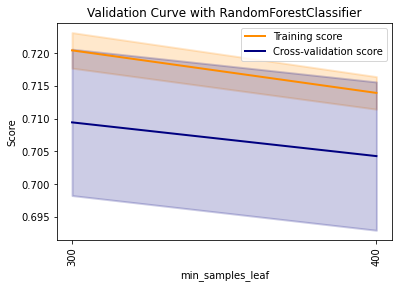

In [9]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(300,500,100),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

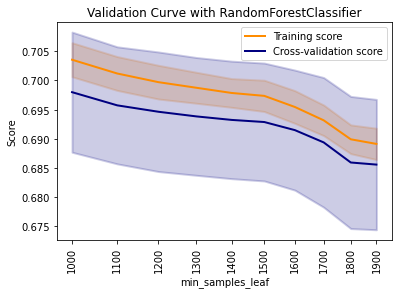

In [10]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(1000,2000,100),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

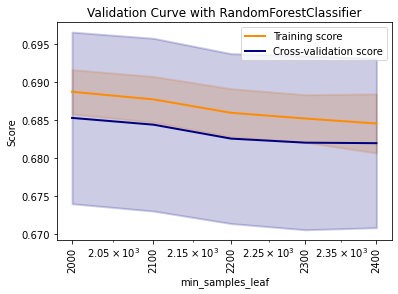

In [11]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(2000,2500,100),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

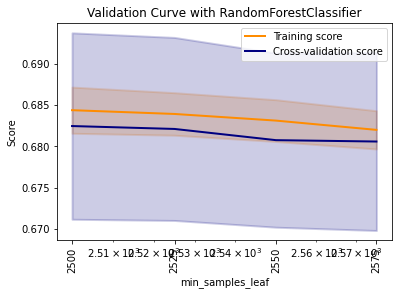

In [12]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(2500,2600,25),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

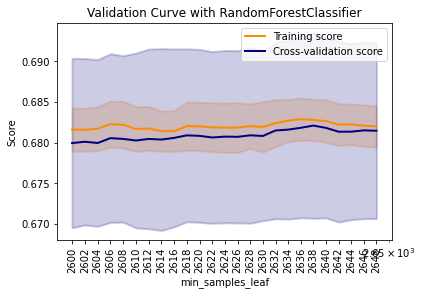

In [13]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(2600,2650,2),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

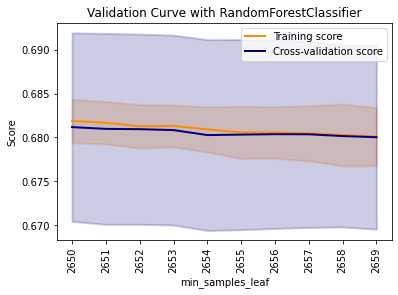

In [14]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8),
                    hyperparameter='min_samples_leaf',
                    hyperparameter_value=range(2650,2660,1),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

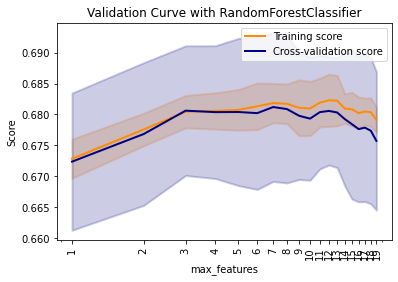

In [15]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656),
                    hyperparameter='max_features',
                    hyperparameter_value=range(1,20,1),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

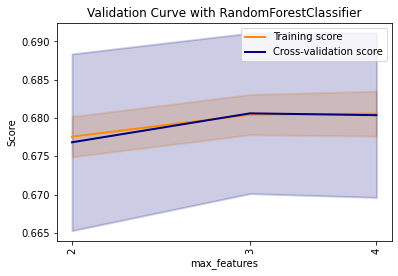

In [16]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656),
                    hyperparameter='max_features',
                    hyperparameter_value=range(2,5,1),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

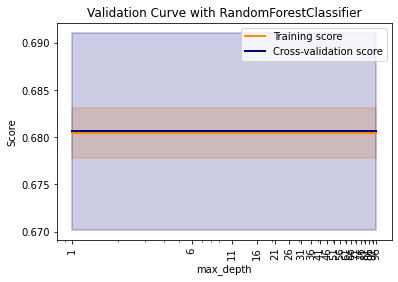

In [17]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656,
                                                         max_features=3),
                    hyperparameter='max_depth',
                    hyperparameter_value=range(1,100,5),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

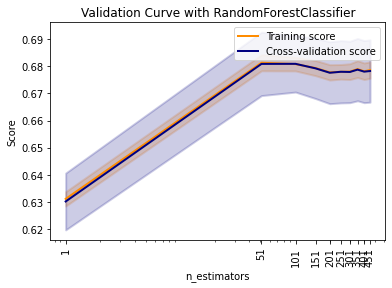

In [18]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656,
                                                         max_features=3),
                    hyperparameter='n_estimators',
                    hyperparameter_value=range(1,500,50),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

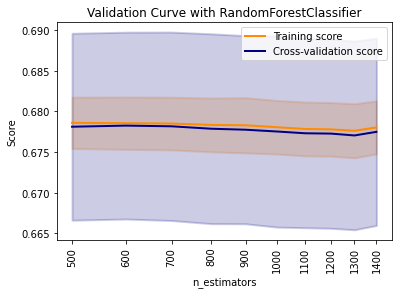

In [19]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656,
                                                         max_features=3),
                    hyperparameter='n_estimators',
                    hyperparameter_value=range(500,1500,100),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

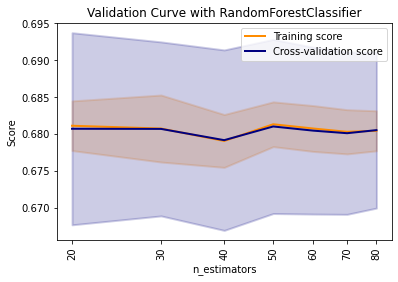

In [20]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656,
                                                         max_features=3),
                    hyperparameter='n_estimators',
                    hyperparameter_value=range(20,81,10),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

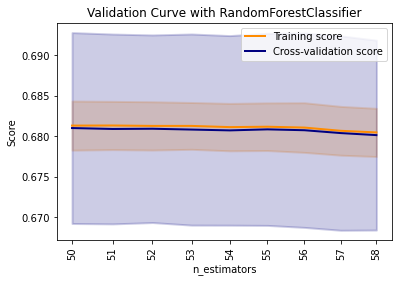

In [21]:
vc.plot_validation_curve(estimator=RandomForestClassifier(random_state=8,
                                                         min_samples_leaf=2656,
                                                         max_features=3),
                    hyperparameter='n_estimators',
                    hyperparameter_value=range(50,59,1),
                    x=x_data,
                    y=y_data,
                    title="RandomForestClassifier",
                    cv=5)

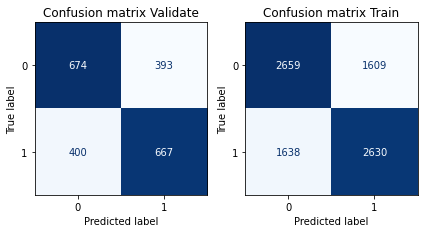

RandomForestClassifier(max_features=3, min_samples_leaf=2656, n_estimators=55,
                       random_state=8)


(RandomForestClassifier(max_features=3, min_samples_leaf=2656, n_estimators=55,
                        random_state=8),
 0.6757759901501025,
 0.6782612743733141)

In [22]:
rf1=RandomForestClassifier(random_state=8,
                         min_samples_leaf=2656,
                         max_features=3,
                        n_estimators=55)
evm.eval_model(rf1,x_train,y_train,x_val,y_val)

In [23]:
from sklearn.model_selection import cross_val_score
space = {
    'max_features': hp.quniform('max_features',2,6,1),
    'min_samples_leaf': hp.quniform('min_samples_leaf',2650,2700,1),
    'n_estimators': hp.quniform('n_estimators',50,59,1)
}
space

{'max_features': <hyperopt.pyll.base.Apply at 0x236f8deb940>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x236f8deb9a0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x236fb492760>}

In [25]:
def objective(space):
   rf = RandomForestClassifier(max_features = int(space['max_features']),min_samples_leaf =int(space['min_samples_leaf']) ,n_estimators = int(space['n_estimators']) )
   acc=cross_val_score(rf, x_train,y_train,cv=50,scoring='roc_auc').mean()
   return{'loss': 1-acc, 'status': STATUS_OK }
best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)
print("Best: ", best)

100%|██████████████████████████████████████████████████| 5/5 [01:15<00:00, 15.17s/trial, best loss: 0.3826981733322603]
Best:  {'max_features': 3.0, 'min_samples_leaf': 2660.0, 'n_estimators': 57.0}


In [29]:
rf2 = RandomForestClassifier(max_features = int(best['max_features']),min_samples_leaf = int(best['min_samples_leaf']),n_estimators = int(best['n_estimators']))

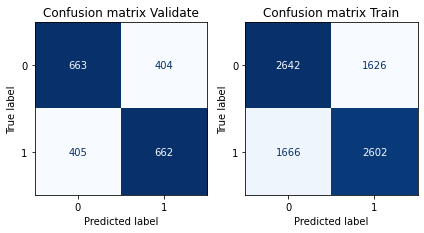

RandomForestClassifier(max_features=3, min_samples_leaf=2660, n_estimators=57)


(RandomForestClassifier(max_features=3, min_samples_leaf=2660, n_estimators=57),
 0.6740666247104715,
 0.6765374983860185)

In [30]:
evm.eval_model(rf2,x_train,y_train,x_val,y_val)

(0.6594577523831787,
 0.613568215892054,
 0.6057361376673039,
 0.6182669789227166,
 0.5937031484257871,
 0.613568215892054)

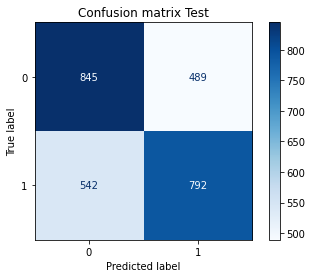

In [28]:
evm.get_performance(rf1, x_test, y_test, "Test", True)

(0.6576629226616078,
 0.6090704647676162,
 0.6023637056805186,
 0.612878200155159,
 0.5922038980509745,
 0.6090704647676162)

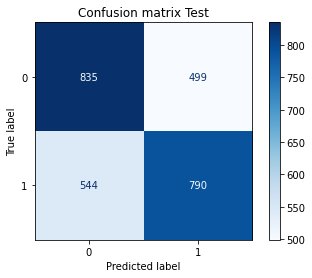

In [31]:
evm.get_performance(rf2, x_test, y_test, "Test", True)

In [32]:
from joblib import dump
dump(rf1,  '../models/sp_wk3_rf_upsample_model.joblib')

['../models/sp_wk3_rf_upsample_model.joblib']